This project utilizes the Online Retail dataset from the UCI Machine Learning Repository, focusing on exploratory data analysis to uncover purchasing trends. We perform RFM (Recency, Frequency, Monetary) analysis to segment customers based on their buying behavior. Additionally, we apply the Apriori algorithm for frequent itemset mining, generating association rules to identify patterns in product purchases, ultimately providing insights into customer preferences and potential marketing strategies.

# Importing Libraries

In [1]:
#import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Data Loading

In [2]:
#Read excel file
df = pd.read_excel('Online Retail.xlsx')

# Data Summary Function

In [3]:
def rstr(df, pred=None):
    #Total observations
    obs = df.shape[0]

    # Calculate various statistics for the DataFrame
    types = df.dtypes
    counts = df.count()  # Count non-null entries
    uniques = df.apply(lambda x: x.unique())  # Get unique values
    nulls = df.isnull().sum()  # Count null values
    distincts = df.nunique()  # Count distinct values
    missing_ratio = (nulls / obs) * 100  # Calculate missing value percentage
    
    # Print the shape of the DataFrame
    print('Data shape:', df.shape)

    # Create a summary DataFrame with the calculated statistics
    if pred is None:
        cols = ['Types', 'Counts', 'Distincts', 'Nulls', 'Missing Ratio', 'Uniques', 'Skewness', 'Kurtosis']
        summary = pd.DataFrame({
            'Types': types,
            'Counts': counts,
            'Distincts': distincts,
            'Nulls': nulls,
            'Missing Ratio': missing_ratio,
            'Uniques': uniques
        })
    else:
        # Correlations
        corr = df.corr()[pred]
        cols = ['Types', 'Counts', 'Distincts', 'Nulls', 'Missing Ratio', 'Uniques', 'Correlation with ' + pred]
        summary = pd.DataFrame({
            'Types': types,
            'Counts': counts,
            'Distincts': distincts,
            'Nulls': nulls,
            'Missing Ratio': missing_ratio,
            'Uniques': uniques,
            'Correlation with ' + pred: corr
        })

    # Display the counts of data types
    print('\nData types:\n',types.value_counts())
    
    # Return the summary DataFrame
    return summary

# Get the summary details and display sorted by missing ratio
details = rstr(df)
display(details.sort_values(by='Missing Ratio', ascending=False))


Data shape: (541909, 8)

Data types:
 object            4
float64           2
int64             1
datetime64[ns]    1
dtype: int64


,Types,Counts,Distincts,Nulls,Missing Ratio,Uniques
CustomerID,float64,406829,4372,135080,24.926694,"[17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ..."
Description,object,540455,4223,1454,0.268311,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
InvoiceNo,object,541909,25900,0,0.000000,"[536365, 536366, 536367, 536368, 536369, 53637..."
StockCode,object,541909,4070,0,0.000000,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
Quantity,int64,541909,722,0,0.000000,"[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80..."
InvoiceDate,datetime64[ns],541909,23260,0,0.000000,"[2010-12-01T08:26:00.000000000, 2010-12-01T08:..."
UnitPrice,float64,541909,1630,0,0.000000,"[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1..."
Country,object,541909,38,0,0.000000,"[United Kingdom, France, Australia, Netherland..."


# Initial Data Exploration

In [4]:
#first 10 rows of the dataset
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
#summary of the dataset, including the number of non-null values, data types, and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#Numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
#statistics for categorical features
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


# Data Cleaning Checks

In [8]:
# Check if there are any rows where both the quantity and price are negative.
# If there are no such entries, print "No"; otherwise, print "Yes".
print('Check if we had negative quantity and prices at the same data enteries:',
      'No' if df[(df.Quantity < 0) & (df.UnitPrice < 0)].shape[0] == 0 else 'Yes', '\n')


Check if we had negative quantity and prices at the same data enteries: No 



In [9]:
# Check how many entries in the dataset have either a negative or zero quantity 
# and also a price that is negative or zero.
print('Check how many data enteries we have where quantity is negative and prices are 0 or vice-versa:',
     df[(df.Quantity <= 0) & (df.UnitPrice <= 0)].shape[0])


Check how many data enteries we have where quantity is negative and prices are 0 or vice-versa: 1336


In [10]:
# Find and print the unique Customer IDs from the entries where both quantity and price are non-positive (zero or negative)
print('\nWhat is the Customer ID of the data enteries above:',
     df.loc[(df.Quantity <= 0) & (df.UnitPrice <= 0), ['CustomerID']].CustomerID.unique())



What is the Customer ID of the data enteries above: [nan]


In [11]:
# Calculate and print the percentage of rows where the quantity is negative
print('\n% Negative Quantity: {:3.2%}'.format(df[(df.Quantity < 0)].shape[0] / df.shape[0]))



% Negative Quantity: 1.96%


In [12]:
# Print the starting character of InvoiceNo for entries where the quantity is negative and CustomerID is not missing
print('\nAll data enteries with negative quantity have Invoices starting with:', 
      df.loc[(df.Quantity < 0) & ~(df.CustomerID.isnull()), 'InvoiceNo'].apply(lambda x: x[0]).unique())



All data enteries with negative quantity have Invoices starting with: ['C']


In [13]:
# Print a message to indicate that we are checking for entries with a negative UnitPrice
print('Check data enteries with UnitPrice negative:')

# Display the rows in the DataFrame where the UnitPrice is negative
display(df[(df.UnitPrice<0)])

# Print the count of sales records that have a Customer ID and a zero in Unit Price
print("Sales records with Customer ID and zero in Unit Price:",df[(df.UnitPrice==0)  & ~(df.CustomerID.isnull())].shape[0])

# Display the entries where the UnitPrice is zero and CustomerID is not missing
df[(df.UnitPrice==0)  & ~(df.CustomerID.isnull())]

Check data enteries with UnitPrice negative:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Sales records with Customer ID and zero in Unit Price: 40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


# Handle Missing Values

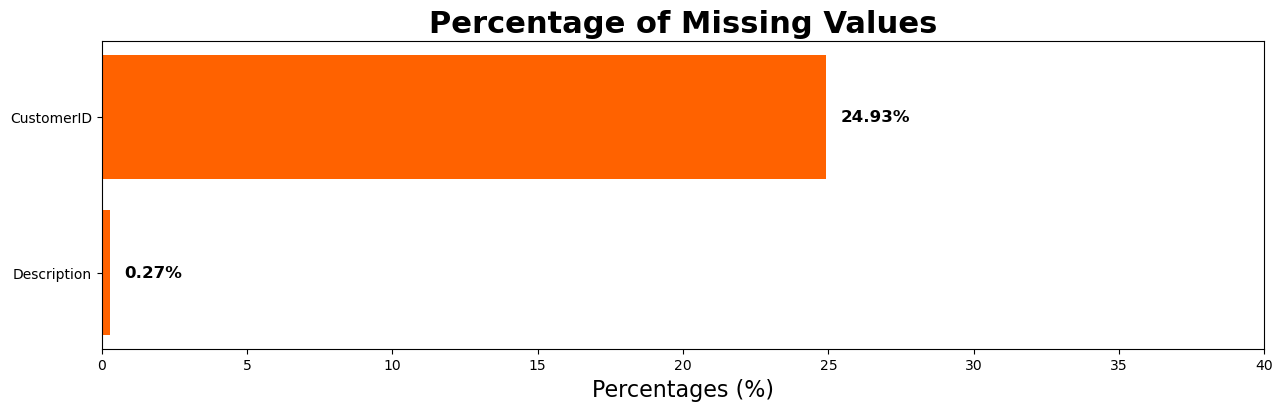

In [14]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values()

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the percentage values on the bars
for i, value in enumerate(missing_percentage):
    ax.text(value + 0.5, i, f"{value:.2f}%", va='center', ha='left', 
            fontweight='bold', fontsize=12, color='black')

# Set limits, labels, and title
ax.set_xlim([0, 40])
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)

# Show the plot
plt.show()


# Data Cleaning

In [15]:
# Remove entries from the DataFrame that do not have a CustomerID
df = df[~(df.CustomerID.isnull())]

# Remove entries where Quantity is negative or represents a return transaction
df = df[~(df.Quantity<0)]

# Keep only the entries where UnitPrice is greater than zero
df = df[df.UnitPrice>0]

# Get the summary details of the DataFrame after cleaning using the rstr function
details = rstr(df)

# Display the summary details sorted by the 'Missing Ratio' in descending order
display(details.sort_values(by='Missing Ratio', ascending=False))

Data shape: (397884, 8)

Data types:
 object            4
float64           2
int64             1
datetime64[ns]    1
dtype: int64


,Types,Counts,Distincts,Nulls,Missing Ratio,Uniques
InvoiceNo,object,397884,18532,0,0.0,"[536365, 536366, 536367, 536368, 536369, 53637..."
StockCode,object,397884,3665,0,0.0,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
Description,object,397884,3877,0,0.0,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
Quantity,int64,397884,301,0,0.0,"[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80..."
InvoiceDate,datetime64[ns],397884,17282,0,0.0,"[2010-12-01T08:26:00.000000000, 2010-12-01T08:..."
UnitPrice,float64,397884,440,0,0.0,"[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1..."
CustomerID,float64,397884,4338,0,0.0,"[17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ..."
Country,object,397884,37,0,0.0,"[United Kingdom, France, Australia, Netherland..."


# Grouping Data for Analysis

In [16]:
# Group the DataFrame by StockCode and Description, and count how many times each combination occurs
cat_des_df = df.groupby(["StockCode", "Description"]).count().reset_index()

# Count how many times each StockCode appears and keep only those with more than 1 occurrence
stock_code_counts = cat_des_df.StockCode.value_counts()
filtered_stock_codes = stock_code_counts[stock_code_counts > 1].reset_index()

# Show the top entries of the filtered stock codes
display(filtered_stock_codes.head())

# Get the 5th StockCode from the filtered counts
fifth_stock_code = filtered_stock_codes['index'][4]

# Find the unique descriptions for the specified StockCode in df
unique_descriptions = df[df['StockCode'] == fifth_stock_code]['Description'].unique()

# Display the unique descriptions
print(unique_descriptions)


,index,StockCode
0,23196,4
1,23236,4
2,23203,3
3,17107D,3
4,23535,3


['BICYCLE SAFTEY WALL ART' 'WALL ART BICYCLE SAFTEY '
 'WALL ART BICYCLE SAFETY']


In [17]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


# SQL Operations with Pandas

In [18]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Get unique descriptions for each StockCode
unique_desc = df[["StockCode", "Description"]].groupby("StockCode").apply(pd.DataFrame.mode).reset_index(drop=True)

# SQL query to join df with unique_desc
query = '''
SELECT df.InvoiceNo, df.StockCode, un.Description, df.Quantity, df.InvoiceDate,
       df.UnitPrice, df.CustomerID, df.Country
FROM df AS df
INNER JOIN unique_desc AS un ON df.StockCode = un.StockCode
'''

# Update df
df = pysqldf(query)


# Data Transformation and Summary Insights

In [19]:
# Convert the InvoiceDate column to a datetime format for easier date operations
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

# Create a new column 'amount' by multiplying Quantity with UnitPrice
df['amount'] = df.Quantity*df.UnitPrice

# Change the CustomerID column to a nullable integer type (Int64) to handle missing values
df.CustomerID = df.CustomerID.astype('Int64')

# Get the summary details of the DataFrame after cleaning using the rstr function
details = rstr(df)

# Display the details sorted by the number of distinct values in each column in descending order
display(details.sort_values(by='Distincts', ascending=False))

Data shape: (397884, 9)

Data types:
 object            3
int64             2
float64           2
datetime64[ns]    1
Int64             1
dtype: int64


,Types,Counts,Distincts,Nulls,Missing Ratio,Uniques
InvoiceNo,int64,397884,18532,0,0.0,"[536365, 536366, 536367, 536368, 536369, 53637..."
InvoiceDate,datetime64[ns],397884,17282,0,0.0,"[2010-12-01T08:26:00.000000000, 2010-12-01T08:..."
CustomerID,Int64,397884,4338,0,0.0,"[17850, 13047, 12583, 13748, 15100, 15291, 146..."
StockCode,object,397884,3665,0,0.0,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
Description,object,397884,3647,0,0.0,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
amount,float64,397884,2939,0,0.0,"[15.299999999999999, 20.34, 22.0, 15.3, 25.5, ..."
UnitPrice,float64,397884,440,0,0.0,"[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1..."
Quantity,int64,397884,301,0,0.0,"[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80..."
Country,object,397884,37,0,0.0,"[United Kingdom, France, Australia, Netherland..."


# Duplicate Detection and Removal

In [20]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
485,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom,1.25
508,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom,1.25
476,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom,4.95
530,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom,4.95
480,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom,2.10
518,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom,2.10
512,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom,2.95
528,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom,2.95
569,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920,United Kingdom,1.65
589,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920,United Kingdom,1.65


In [21]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5194 duplicate rows that need to be removed.


# Stock Code Analysis

In [22]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3665


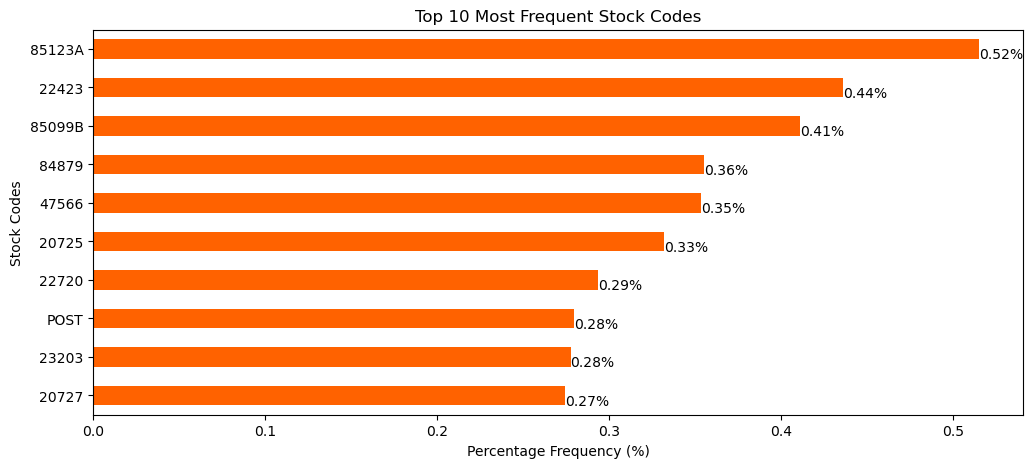

In [23]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

# Sales Analysis by Country

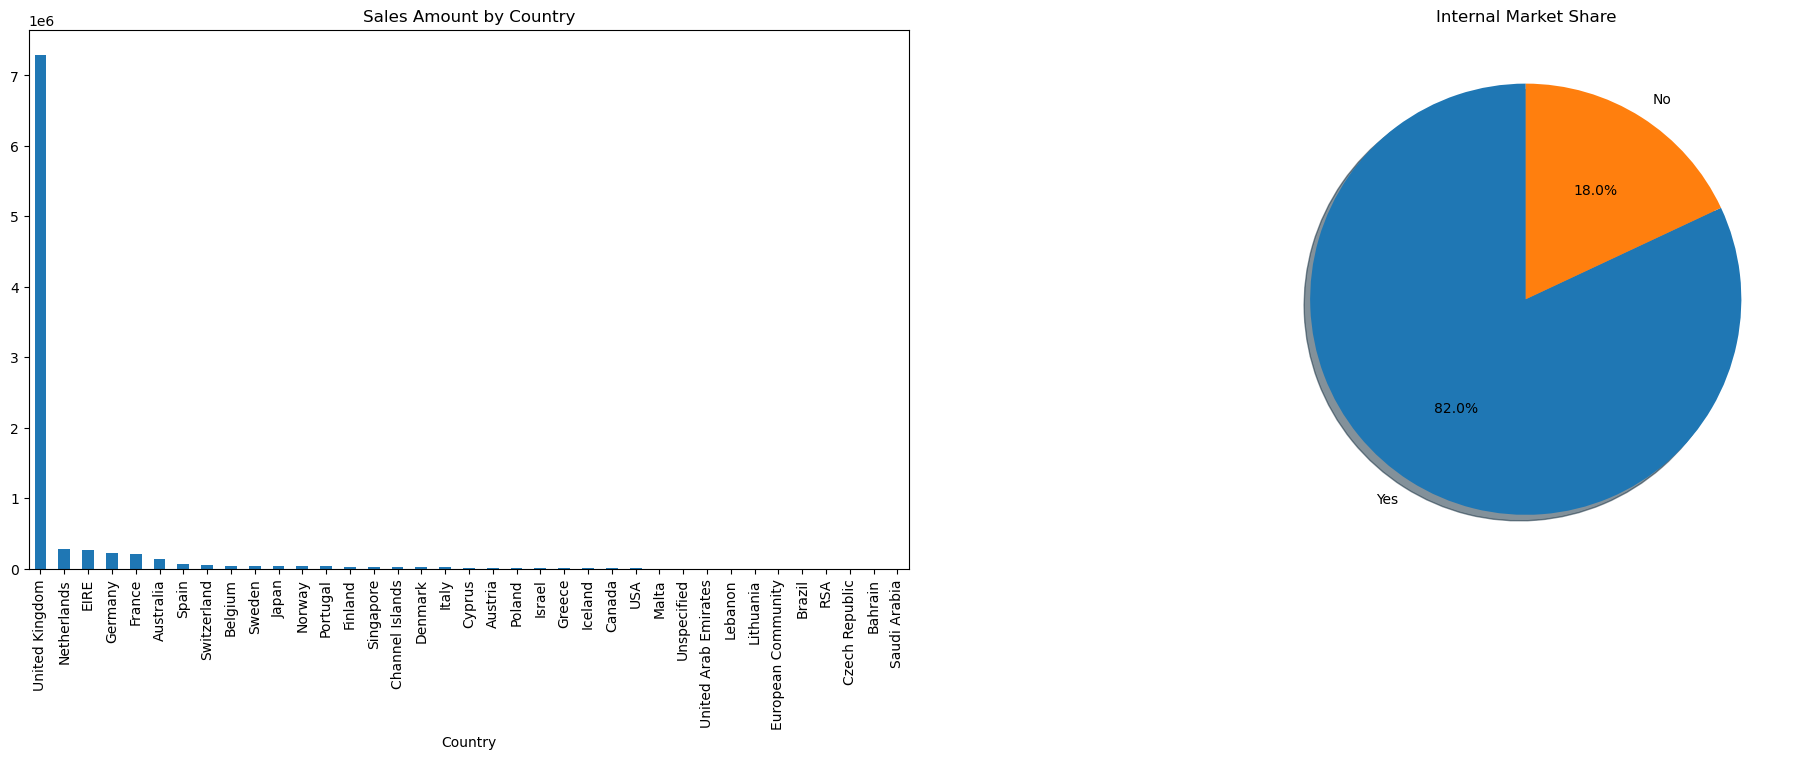

In [24]:
# Create a figure with a specified size
fig = plt.figure(figsize=(25, 7))

# Create the first subplot for sales by country
f1 = fig.add_subplot(121)
sales_by_country = df.groupby("Country").amount.sum().sort_values(ascending=False)
sales_by_country.plot(kind='bar', title='Sales Amount by Country')

# Create a new column to identify if the country is the United Kingdom
df['Internal'] = df['Country'].apply(lambda x: 'Yes' if x == 'United Kingdom' else 'No')

# Create the second subplot for internal market pie chart
f2 = fig.add_subplot(122)
internal_market = df.groupby("Internal").amount.sum().sort_values(ascending=False)
plt.pie(internal_market, labels=internal_market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Internal Market Share')

# Display the plots
plt.show()


# Customer Sales Analysis

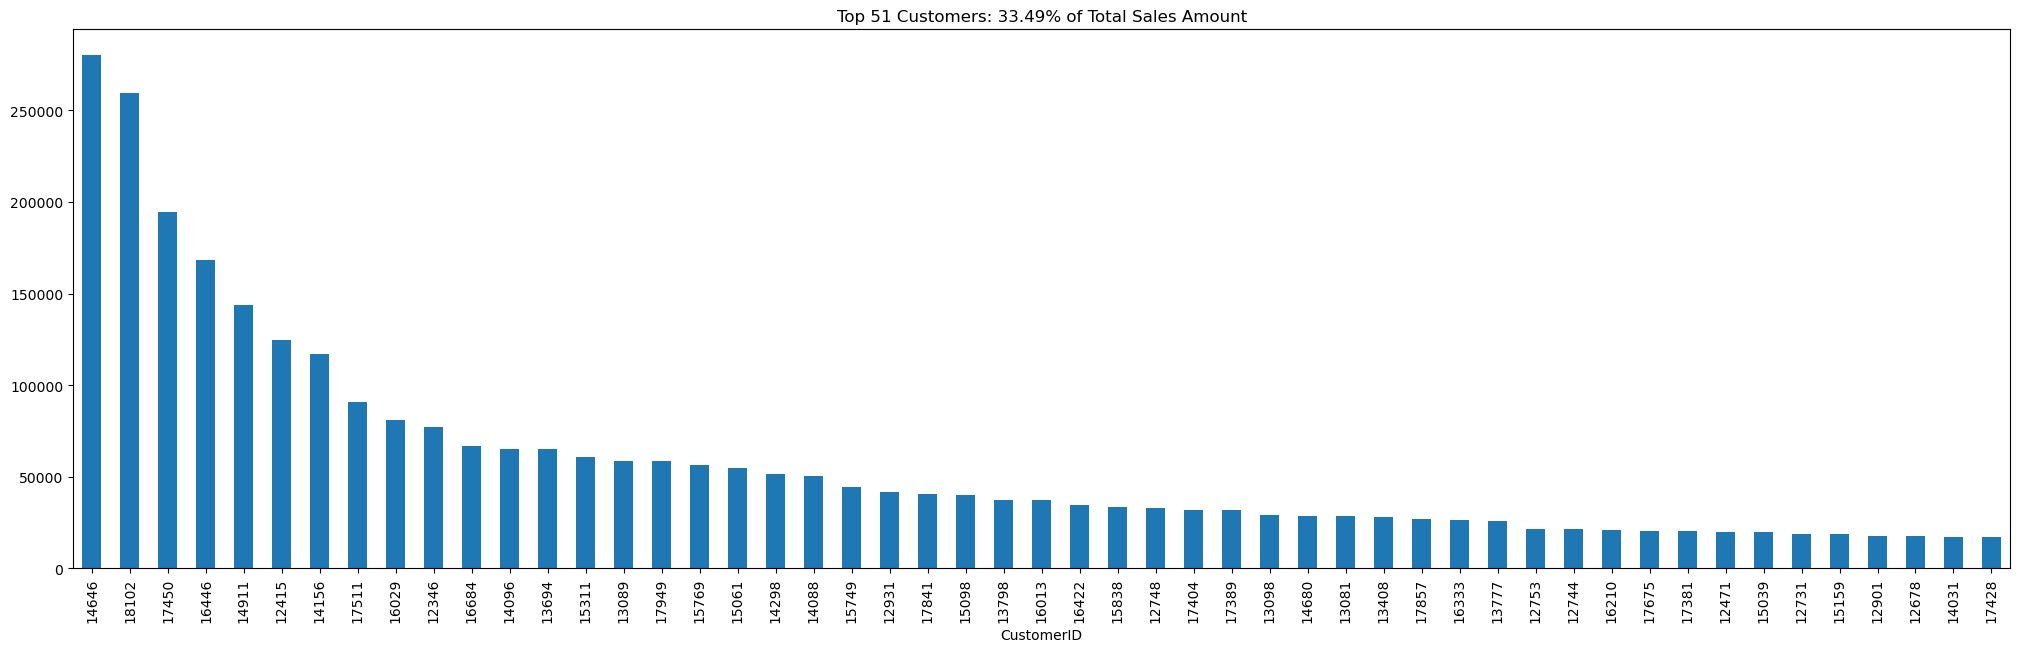

In [25]:
#Top 51 Customers by Sales Amount
# Create a figure for the bar chart of top 51 customers by sales amount
fig1 = plt.figure(figsize=(25, 7))

# Calculate the total sales and the sales of the top 51 customers
total_sales = df.groupby("CustomerID").amount.sum().sort_values(ascending=False).sum()
top_51_sales = df.groupby("CustomerID").amount.sum().sort_values(ascending=False)[:51].sum()
percent_sales_51 = np.round((top_51_sales / total_sales) * 100, 2)

# Plot the top 51 customers based on sales amount
g1 = df.groupby("CustomerID").amount.sum().sort_values(ascending=False)[:51].plot(
    kind='bar',
    title='Top 51 Customers: {:3.2f}% of Total Sales Amount'.format(percent_sales_51)
)

# Display the plot
plt.show()


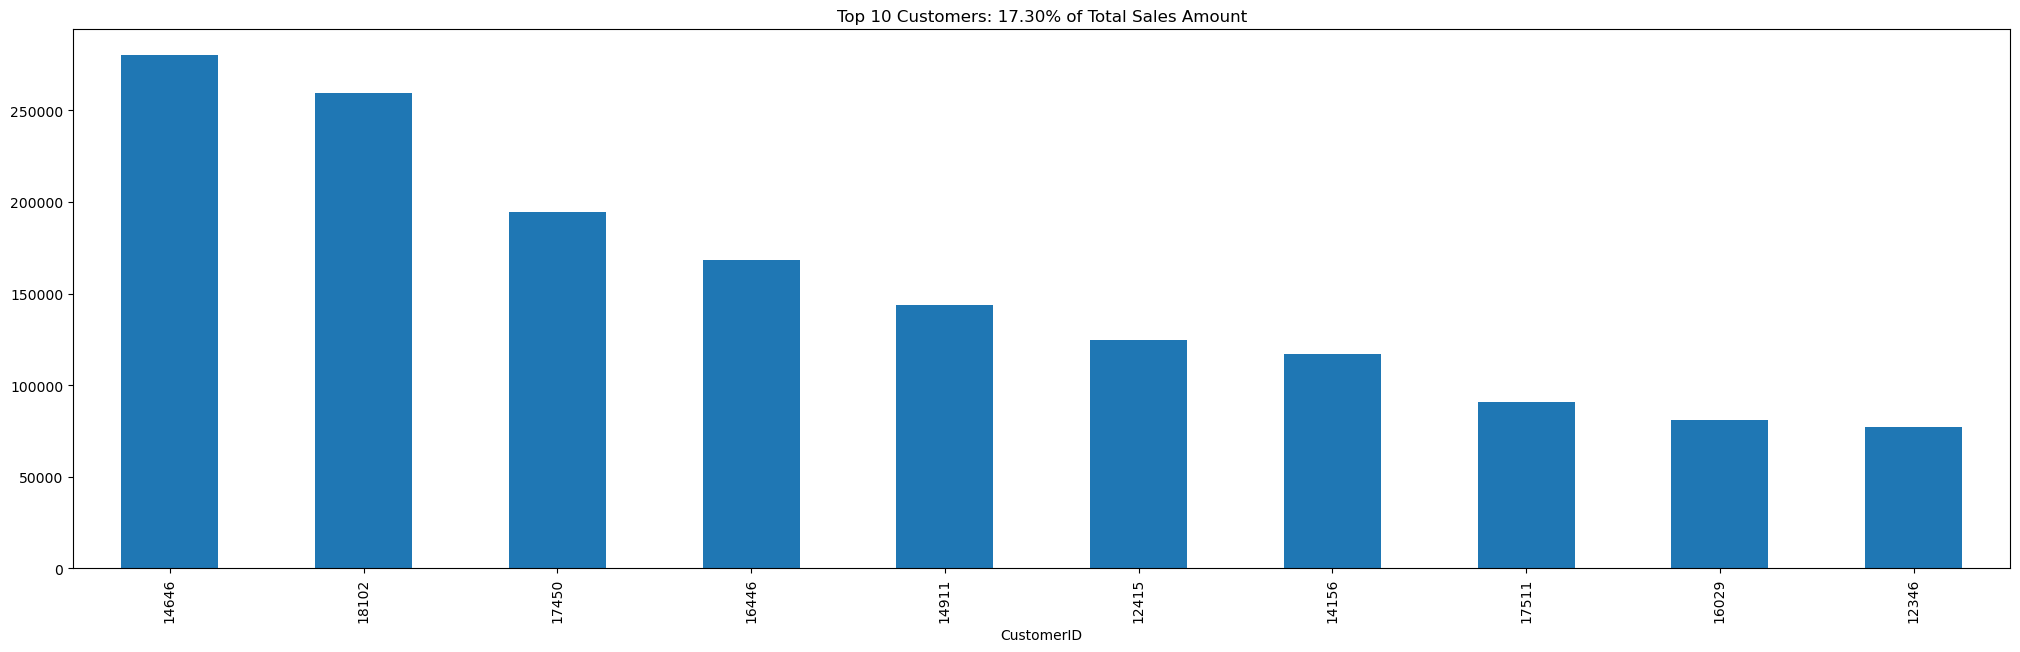

In [26]:
#Top 10 Customers by Sales Amount
# Create a new figure for the bar chart of the top 10 customers by sales amount
fig2 = plt.figure(figsize=(25, 7))

# Calculate the sales of the top 10 customers
top_10_sales = df.groupby("CustomerID").amount.sum().sort_values(ascending=False)[:10].sum()
percent_sales_10 = np.round((top_10_sales / total_sales) * 100, 2)

# Plot the top 10 customers based on sales amount
g2 = df.groupby("CustomerID").amount.sum().sort_values(ascending=False)[:10].plot(
    kind='bar',
    title='Top 10 Customers: {:3.2f}% of Total Sales Amount'.format(percent_sales_10)
)

# Display the plot
plt.show()


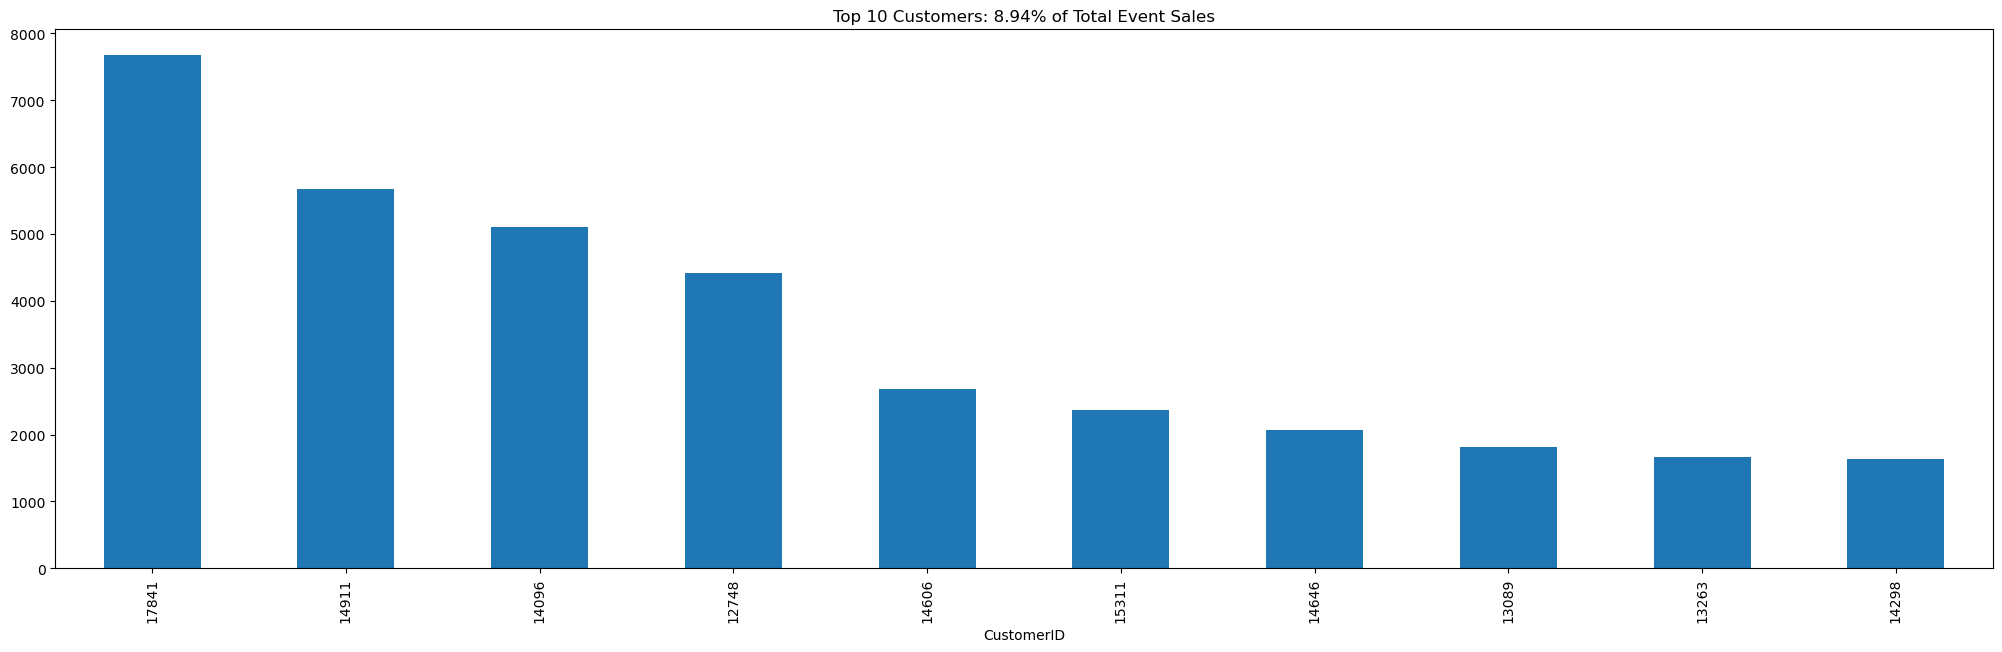

In [27]:
# top 10 customers by the number of events(No.of purchases or transactions)
# Create a new figure for the bar chart of the top 10 customers by the number of events
fig3 = plt.figure(figsize=(25, 7))

# Calculate the number of events for the top 10 customers
top_10_event_count = df.groupby("CustomerID").amount.count().sort_values(ascending=False)[:10].sum()
percent_event_sales = np.round((top_10_event_count / df.groupby("CustomerID").amount.count().sum()) * 100, 2)

# Plot the top 10 customers based on the number of events
g3 = df.groupby("CustomerID").amount.count().sort_values(ascending=False)[:10].plot(
    kind='bar',
    title='Top 10 Customers: {:3.2f}% of Total Event Sales'.format(percent_event_sales)
)

# Display the plot
plt.show()


# Recency 

In [28]:
# Convert InvoiceDate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)
customer_data.head()


,CustomerID,Days_Since_Last_Purchase
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310


# Convert 'InvoiceDate' to Datetime Format

In [29]:
# Convert InvoiceDate to datetime 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter data for 2009-2010 and 2010-2011 based on the InvoiceDate
df_2009_2010 = df[(df['InvoiceDate'] >= '2009-01-01') & (df['InvoiceDate'] < '2010-01-01')]
df_2010_2011 = df[(df['InvoiceDate'] >= '2010-01-01') & (df['InvoiceDate'] < '2011-01-01')]

# Print the Min and Max Invoice Dates for each period
print("2009: Min Date", df_2009_2010["InvoiceDate"].min(), "Max Date", df_2009_2010["InvoiceDate"].max())
print("2010: Min Date", df_2010_2011["InvoiceDate"].min(), "Max Date", df_2010_2011["InvoiceDate"].max())

2009: Min Date NaT Max Date NaT
2010: Min Date 2010-12-01 08:26:00 Max Date 2010-12-23 16:06:00


In [30]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter for 2009-2010
df_2009_2010 = df[(df['InvoiceDate'] >= '2009-01-01') & (df['InvoiceDate'] < '2010-12-09')]

# Filter for 2010-2011
df_2010_2011 = df[(df['InvoiceDate'] >= '2010-12-09') & (df['InvoiceDate'] < '2011-12-09')]

In [31]:
# Recency calculation for 2009-2010 period
recency1 = (dt.datetime(2010, 12, 9) - df_2009_2010.groupby("CustomerID").agg({"InvoiceDate": "max"})).rename(columns={"InvoiceDate": "Recency"})
recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)

# Recency calculation for 2010-2011 period
recency2 = (dt.datetime(2011, 12, 9) - df_2010_2011.groupby("CustomerID").agg({"InvoiceDate": "max"})).rename(columns={"InvoiceDate": "Recency"})
recency2["Recency"] = recency2["Recency"].apply(lambda x: x.days)

# Display the first few rows of recency2
recency2.head()


,Recency
CustomerID,
12346,324
12347,1
12348,74
12349,17
12350,309


# Frequency

In [32]:
# Frequency calculation for 2009-2010 period
freq1 = df_2009_2010.groupby("CustomerID").agg({"InvoiceDate": "nunique"}).rename(columns={"InvoiceDate": "Frequency"})

# Frequency calculation for 2010-2011 period
freq2 = df_2010_2011.groupby("CustomerID").agg({"InvoiceDate": "nunique"}).rename(columns={"InvoiceDate": "Frequency"})

# Display the first few rows of freq2
freq2.head()


,Frequency
CustomerID,
12346,1
12347,6
12348,4
12349,1
12350,1


# Monetary

In [33]:
# Calculate TotalPrice for each period
df_2009_2010["TotalPrice"] = df_2009_2010["Quantity"] * df_2009_2010["UnitPrice"]
df_2010_2011["TotalPrice"] = df_2010_2011["Quantity"] * df_2010_2011["UnitPrice"]

# Monetary calculation for 2009-2010 period
monetary1 = df_2009_2010.groupby("CustomerID").agg({"TotalPrice": "sum"}).rename(columns={"TotalPrice": "Monetary"})

# Monetary calculation for 2010-2011 period
monetary2 = df_2010_2011.groupby("CustomerID").agg({"TotalPrice": "sum"}).rename(columns={"TotalPrice": "Monetary"})

# Display the first few rows of monetary2
monetary2.head()


,Monetary
CustomerID,
12346,77183.60
12347,3598.21
12348,1797.24
12349,1757.55
12350,334.40


# RFM 

- **RFM** stands for **Recency**, **Frequency**, and **Monetary value**, key metrics that indicate customer behavior.
- **Recency** measures how recently a customer made a purchase, with more recent purchases suggesting greater responsiveness to promotions.
- **Frequency** reflects how often a customer buys, indicating higher engagement and satisfaction.
- **Monetary value** differentiates heavy spenders from low-value purchasers, highlighting their overall contribution to revenue.

In [34]:
# Combine recency1, freq1, and monetary1 into one table called rfm1
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)

# Combine recency2, freq2, and monetary2 into another table called rfm2
rfm2 = pd.concat([recency2, freq2, monetary2],  axis=1)

# Show the first 5 rows of the rfm2 table
rfm2.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,324,1,77183.60
12347,1,6,3598.21
12348,74,4,1797.24
12349,17,1,1757.55
12350,309,1,334.40


In [35]:
# Create a Recency Score for rfm1,rfm2 by dividing Recency into 3 groups and labeling them 3, 2, 1
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 3, labels = [3, 2, 1])
rfm2["RecencyScore"] = pd.qcut(rfm2["Recency"], 3, labels = [3, 2, 1])

# Create a Frequency Score for rfm1,rfm2 by ranking Frequency, dividing it into 3 groups, and labeling them 1, 2, 3
rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),3, labels=[1,2,3])
rfm2["FrequencyScore"]= pd.qcut(rfm2["Frequency"].rank(method="first"),3, labels=[1,2,3])

# Create a Monetary Score for rfm1,rfm2 by dividing Monetary into 3 groups and labeling them 1, 2, 3
rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 3, labels = [1, 2, 3])
rfm2["MonetaryScore"] = pd.qcut(rfm2['Monetary'], 3, labels = [1, 2, 3])

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346,324,1,77183.60,1,1,3
12347,1,6,3598.21,3,3,3
12348,74,4,1797.24,2,2,3
12349,17,1,1757.55,3,1,3
12350,309,1,334.40,1,1,1


In [36]:
# Combine RecencyScore, FrequencyScore, and MonetaryScore to create a new RFM score
# The scores are converted to strings and then joined together
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))

rfm2["RFM_SCORE"] = (rfm2['RecencyScore'].astype(str) + 
                     rfm2['FrequencyScore'].astype(str) + 
                     rfm2['MonetaryScore'].astype(str))
#show first 5 rows of rfm2
rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346,324,1,77183.60,1,1,3,113
12347,1,6,3598.21,3,3,3,333
12348,74,4,1797.24,2,2,3,223
12349,17,1,1757.55,3,1,3,313
12350,309,1,334.40,1,1,1,111


The process outlined involves creating two distinct RFM (Recency, Frequency, Monetary) tables, `rfm1` and `rfm2`, by combining respective recency, frequency, and monetary values for each customer. 

In `rfm2`, we observe the first five customers, each with their RFM metrics. For example, CustomerID 12346 has a high recency score of 1, indicating recent engagement, but a low frequency score of 1, suggesting they infrequently make purchases despite their substantial monetary contribution of $77,183.60, reflected in a monetary score of 3. This results in an overall RFM score of "113," highlighting that while this customer has high value, they are not highly engaged.

Conversely, CustomerID 12347 displays excellent engagement with a recency score of 3, a frequency score of 3, and a monetary score of 3, culminating in an RFM score of "333." This customer exemplifies ideal behavior, frequently purchasing and contributing significantly to total revenue. 

The other customers show varying patterns of engagement and spending. CustomerID 12348, with a moderate recency score of 2, frequency score of 2, and monetary score of 3, indicates a customer who may be moderately engaged but still provides considerable monetary value. CustomerID 12349 shows signs of potential churn with a high recency score of 3 and a low frequency score of 1, indicating infrequent purchases. Lastly, CustomerID 12350, with the lowest scores across the board, suggests minimal engagement and low monetary contribution, represented by an RFM score of "111."

Overall, the RFM scoring allows for a nuanced understanding of customer behavior, enabling targeted strategies for retention, reactivation, or further engagement based on individual scores and patterns.

# Customer Segmentation

In [37]:
# Define customer segments
seg_map = {
    r'[3][3]': 'Loyal Customers',            # High recency and frequency(Frequent buyers with high monetary value)
    r'[1-2][3]': 'At-Risk Customers',        # Low recency, high frequency (strong past but recent inactivity)
    r'[1-2][1-2]': 'At-Risk Customers',      # Customers with both low recency and frequency (haven't purchased recently and rarely buy)
    r'[2-3][1-2]': 'Average Customers'       # Moderate values for recency and frequency
}


# Create segment for rfm1
rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)
rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)

# Create segment for rfm2
rfm2['Segment'] = rfm2['RecencyScore'].astype(str) + rfm2['FrequencyScore'].astype(str)
rfm2['Segment'] = rfm2['Segment'].replace(seg_map, regex=True)

# Identify customers with no purchases and assign them 'At-Risk Customers'
rfm1.loc[rfm1['Frequency'] == 0, 'Segment'] = 'At-Risk Customers'
rfm2.loc[rfm2['Frequency'] == 0, 'Segment'] = 'At-Risk Customers'

# Display the first few rows of rfm2
rfm2.head()


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346,324,1,77183.60,1,1,3,113,At-Risk Customers
12347,1,6,3598.21,3,3,3,333,Loyal Customers
12348,74,4,1797.24,2,2,3,223,At-Risk Customers
12349,17,1,1757.55,3,1,3,313,Average Customers
12350,309,1,334.40,1,1,1,111,At-Risk Customers


The customer segmentation assigns customers into categories based on recency and frequency scores: *Loyal Customers*, *At-Risk Customers*, and *Average Customers*. High recency and frequency scores are labeled as "Loyal Customers," reflecting frequent, recent purchases. Customers with lower recency and frequency scores are categorized as "At-Risk," indicating declining activity, while those with moderate scores fall into the "Average Customers" segment. This segmentation allows targeted strategies to retain loyal customers, re-engage at-risk ones, and foster growth in the average group.

# 2009-2010

In [38]:
# Group the rfm1 data by 'Segment' and calculate statistical measures for Recency, Frequency, and Monetary
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])

# Combine the multi-level column names into single strings, separating them with an underscore (e.g., "Recency_mean", "Frequency_median")
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')

# Output
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
At-Risk Customers,5.352060,6.0,267,1.498002,1.235955,1.0,267,1.985033,407.538764,283.150,267,527.935680
Average Customers,0.922535,1.0,142,0.859440,1.000000,1.0,142,0.000000,325.615282,293.145,142,250.232413
Loyal Customers,0.886598,1.0,97,0.852402,2.030928,2.0,97,1.710590,1210.435464,410.670,97,2967.980947


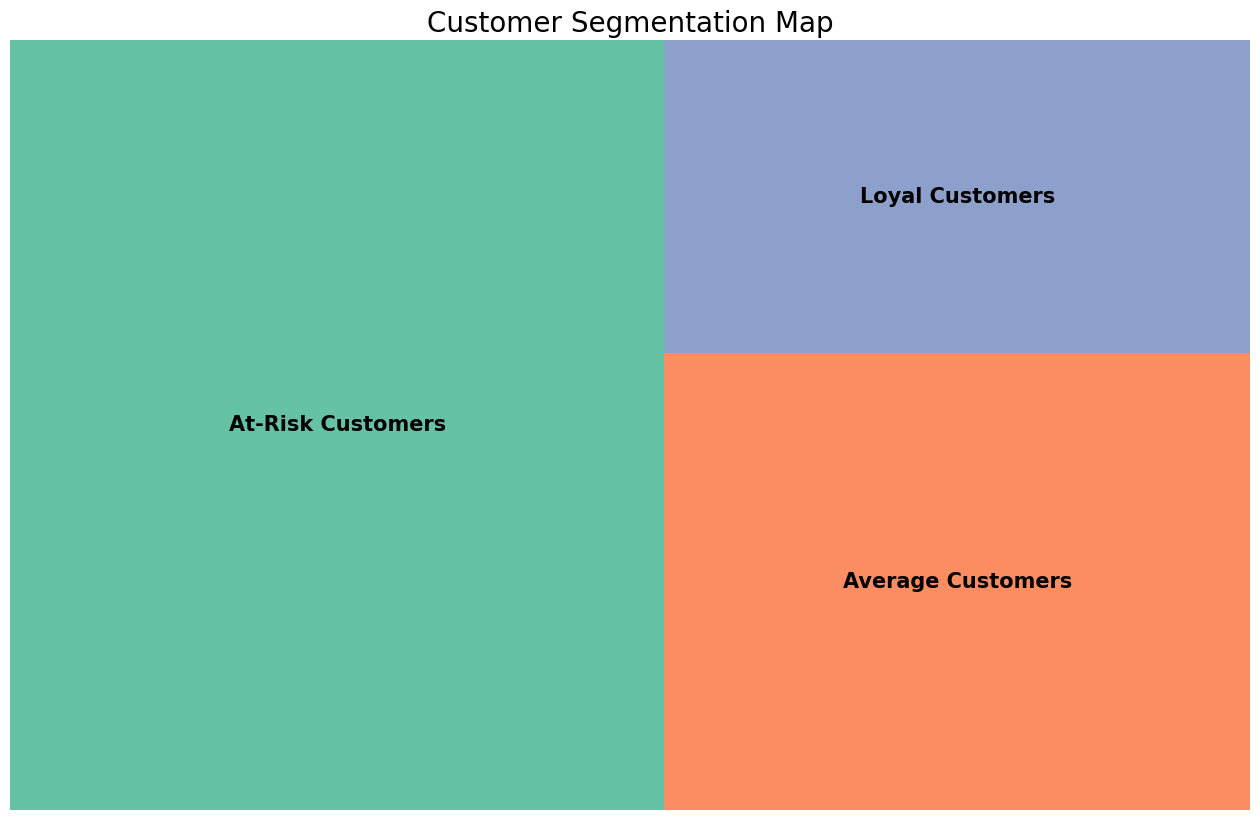

In [39]:
import squarify

# Count the number of customers in each segment
segments = rfm1["Segment"].value_counts().sort_values(ascending=False)

# Set up the figure and axis
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot()

# Create a treemap
squarify.plot(
    sizes=segments,
    label=segments.index,  # Use the index for labels directly from the segments variable
    color=[
       "#66C2A5",  # color for 'Loyal Customers'
        "#FC8D62",  # color for 'At-Risk Customers'
        "#8DA0CB",  # color for 'Average Customers'
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15, "weight": "bold"},  # Bold text for better visibility
)

# Set titles and labels
plt.title("Customer Segmentation Map", fontsize=20)
plt.axis('off')  # Hide the axes for a cleaner look
plt.show()


This visualization effectively represents customer distribution across segments. The largest area, *At-Risk Customers*, indicates a high count of customers with decreased engagement, signaling a key opportunity for re-engagement efforts. *Loyal Customers*, occupying a distinct section, reflect a smaller but highly valuable group who frequently and recently made purchases, underscoring their strong retention and importance to overall sales. The *Average Customers* segment, displayed in a unique color, highlights moderate purchasing activity, showing a stable yet moderate level of engagement. This segmentation map visually emphasizes the importance of retention for loyal customers while spotlighting reactivation strategies for at-risk customers and potential growth within the average segment.

# 2010-2011

In [40]:
# Group the rfm2 data by 'Segment' and calculate statistical measures for Recency, Frequency, and Monetary
rfmStats2 = rfm2[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])

#Combine the multi-level column names into single strings, separating them with an underscore (e.g., "Recency_mean", "Frequency_median")
rfmStats2.columns = rfmStats2.columns.map('_'.join).str.strip('|')

#Output
rfmStats2

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
At-Risk Customers,125.772855,86.0,2844,94.659594,2.510197,2.0,2844,2.511087,1019.012294,488.755,2844,2706.602133
Average Customers,12.091854,13.0,577,7.261262,2.017331,2.0,577,0.831066,752.686256,471.780,577,1069.478393
Loyal Customers,8.927230,8.0,852,6.959805,11.064554,7.0,852,13.805066,5982.974167,2519.615,852,17590.796856


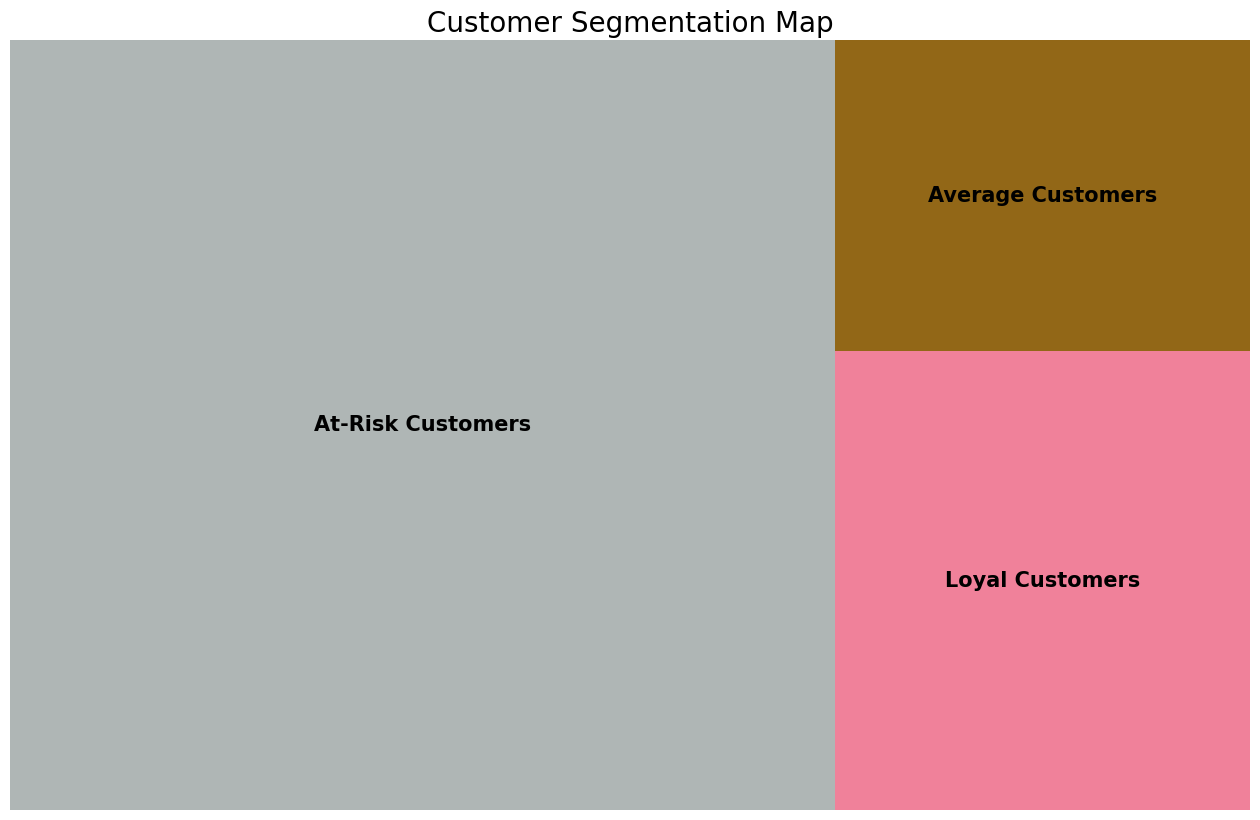

In [41]:
import squarify

# Count the number of customers in each segment
segments = rfm2["Segment"].value_counts().sort_values(ascending=False)

# Set up the figure and axis
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot()

# Create a treemap
squarify.plot(
    sizes=segments,
    label=segments.index,  # Use the index for labels directly from the segments variable
    color=[
        "#AFB6B5",  # Color for 'Loyal Customers'
        "#F0819A",  # Color for 'At-Risk Customers'
        "#926717",  # Color for 'Average Customers'
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15, "weight": "bold"},  # Bold text for better visibility
)

# Set titles and labels
plt.title("Customer Segmentation Map", fontsize=20)
plt.axis('off')  # Hide the axes for a cleaner look
plt.show()


# Prepare Transaction Dataset for Association Rules

In [42]:
from mlxtend.preprocessing import TransactionEncoder

# Prepare the transaction dataset
items = list(df.Description.unique())
grouped = df.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo', 'Description']]

# Create a list of transactions
transactions = []
for rec in transaction_level.to_dict('records'):
    items_list = rec['Description']
    transactions.append(items_list)

# Convert the dataset into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the one-hot encoded DataFrame
print("One-Hot Encoded Transaction DataFrame:")
print(transaction_df)

One-Hot Encoded Transaction DataFrame:
        4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
0                               False                           False   
1                               False                           False   
2                               False                           False   
3                               False                           False   
4                               False                           False   
...                               ...                             ...   
18527                           False                           False   
18528                           False                           False   
18529                           False                           False   
18530                           False                           False   
18531                           False                           False   

        DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
0                   False

# Frequent Itemset Mining Using Apriori Algorithm

In [43]:
from mlxtend.frequent_patterns import apriori, association_rules

# Define the minimum support threshold (e.g., 0.010 means an itemset must appear in at least 1% of transactions)
min_support = 0.010

# Perform frequent itemset mining using Apriori
frequent_itemsets = apriori(transaction_df, min_support=min_support, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
       support                                           itemsets
0     0.019858                 ( SET 2 TEA TOWELS I LOVE LONDON )
1     0.013058                           (10 COLOUR SPACEBOY PEN)
2     0.010091                  (12 MESSAGE CARDS WITH ENVELOPES)
3     0.014893                    (12 PENCIL SMALL TUBE WOODLAND)
4     0.016566              (12 PENCILS SMALL TUBE RED RETROSPOT)
...        ...                                                ...
1027  0.011763  (LUNCH BAG WOODLAND, LUNCH BAG SUKI DESIGN , L...
1028  0.014300  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...
1029  0.010037  (POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...
1030  0.012897  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...
1031  0.010414  (LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE,...

[1032 rows x 2 columns]


The code performs association rule mining using the Apriori algorithm to identify frequent itemsets in a transaction dataset. It prepares the data by grouping items by invoice, creating a one-hot encoded DataFrame that indicates item presence in transactions. With a minimum support threshold of 1%, the Apriori algorithm reveals itemsets that frequently occur together. This analysis provides insights into customer purchasing behavior, which can inform marketing strategies and cross-selling opportunities. Overall, it helps in understanding product relationships to enhance sales and inventory decisions.

# Association Rules

In [44]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with minimum confidence threshold (e.g., 0.001)
min_confidence = 0.001
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

print("\nAssociation Rules:")
association_rules_df


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PACK OF 72 RETROSPOT CAKE CASES),(60 CAKE CASES DOLLY GIRL DESIGN),0.055526,0.019102,0.010199,0.183673,9.615358,0.009138,1.201600,0.948675
1,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.019102,0.055526,0.010199,0.533898,9.615358,0.009138,2.026327,0.913448
2,(60 CAKE CASES VINTAGE CHRISTMAS),(SET OF 20 VINTAGE CHRISTMAS NAPKINS),0.025200,0.026387,0.010091,0.400428,15.175331,0.009426,1.623848,0.958251
3,(SET OF 20 VINTAGE CHRISTMAS NAPKINS),(60 CAKE CASES VINTAGE CHRISTMAS),0.026387,0.025200,0.010091,0.382413,15.175331,0.009426,1.578402,0.959420
4,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.035452,0.027034,0.011979,0.337900,12.498911,0.011021,1.469514,0.953808
...,...,...,...,...,...,...,...,...,...,...
1115,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...","(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT)",0.027898,0.023041,0.010414,0.373308,16.201722,0.009772,1.558913,0.965205
1116,(LUNCH BAG PINK POLKADOT),"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",0.050237,0.014138,0.010414,0.207304,14.663196,0.009704,1.243683,0.981089
1117,(LUNCH BAG CARS BLUE),"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",0.052126,0.016620,0.010414,0.199793,12.021309,0.009548,1.228907,0.967232
1118,(LUNCH BAG RED RETROSPOT),"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.,...",0.069555,0.014030,0.010414,0.149728,10.672185,0.009439,1.159595,0.974049


The generated association rules illustrate significant purchasing patterns among items. Each rule features an antecedent that, when purchased, predicts the purchase of a consequent item. For instance, buying "60 CAKE CASES DOLLY GIRL DESIGN" corresponds to a 53.39% likelihood of also purchasing "PACK OF 72 RETROSPOT CAKE CASES," with a lift of 9.62, indicating a strong association between these products. Similarly, the combination of "SET OF 20 VINTAGE CHRISTMAS NAPKINS" and "60 CAKE CASES VINTAGE CHRISTMAS" reveals a lift of 15.18, highlighting a notable relationship. High-confidence rules such as these reflect distinct consumer behavior, providing opportunities for strategic product placements, promotional bundling, or targeted marketing initiatives. Overall, these insights into paired item purchases can enhance merchandising tactics and better meet customer needs.

In [45]:
#Second method
data=pd.read_excel('Online Retail.xlsx')
print(data.info())
data[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [46]:
from mlxtend.preprocessing import TransactionEncoder

# Check for NaN values in 'Description' and drop them
df['Description'] = df['Description'].astype(str)  # Ensure all descriptions are strings
df.dropna(subset=['Description'], inplace=True)   # Drop any rows where 'Description' is NaN

# Prepare the transaction dataset
grouped = df.groupby('InvoiceNo')['Description'].apply(list).reset_index(name='Items')

# Create a list of transactions
transactions = grouped['Items'].tolist()

# Print the number of transactions and the first few transactions
print(f"Number of Transactions: {len(transactions)}")
print("First few transactions:", transactions[:5])

# Convert the dataset into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Print the shape of the transaction DataFrame
print("Shape of the transaction DataFrame:", transaction_df.shape)

# Define the minimum support threshold (e.g., 0.025 means an itemset must appear in at least 2.5% of transactions)
min_support = 0.025  # Lower the support threshold to see 

# Perform frequent itemset mining using Apriori
frequent_itemsets = apriori(transaction_df, min_support=min_support, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)

# Check if frequent_itemsets is empty
if frequent_itemsets.empty:
    print("No frequent itemsets found with the given support threshold.")

# Generate association rules with a minimum confidence threshold (e.g., 0.002)
min_confidence = 0.002
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

print("\nAssociation Rules:")
#print(association_rules_df)
association_rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


Number of Transactions: 18532
First few transactions: [['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED RETROSPOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]
Shape of the transaction DataFrame: (18532, 3647)
Frequent Itemsets:
      support                                     

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.028599,0.671736,14.194548
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.028599,0.604333,14.194548
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029193,0.782923,18.530185
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.029193,0.690932,18.530185
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.029463,0.341250,7.260672
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.029463,0.626866,7.260672
6,(JUMBO BAG RED RETROSPOT),(JUMBO BAG VINTAGE DOILY ),0.025254,0.292500,5.019083
7,(JUMBO BAG VINTAGE DOILY ),(JUMBO BAG RED RETROSPOT),0.025254,0.433333,5.019083
8,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.025038,0.498389,8.779602
9,(LUNCH BAG BLACK SKULL.),(LUNCH BAG PINK POLKADOT),0.025038,0.441065,8.779602


The association rules generated reveal strong patterns in item purchases. Each rule consists of an *antecedent* and a *consequent*, where the antecedent item’s purchase often predicts the consequent item's purchase. For example, if a customer buys an "ALARM CLOCK BAKELIKE GREEN," they are about 67% likely to also buy an "ALARM CLOCK BAKELIKE RED," with a lift of 14.19. This high lift indicates that these items are bought together far more frequently than by chance. Similarly, the rule concerning "ROSES REGENCY TEACUP AND SAUCER" and "GREEN REGENCY TEACUP AND SAUCER" shows an 18.53 lift, suggesting a significant association. High-confidence rules like these suggest clear customer purchasing behaviors that can inform product placements, bundling strategies, or targeted marketing efforts. Overall, items like matching colored alarm clocks or themed lunch bags appear frequently in pairs, offering valuable insights into customer preferences and potential merchandising opportunities.

# Top 5 Customers Based on Revenue

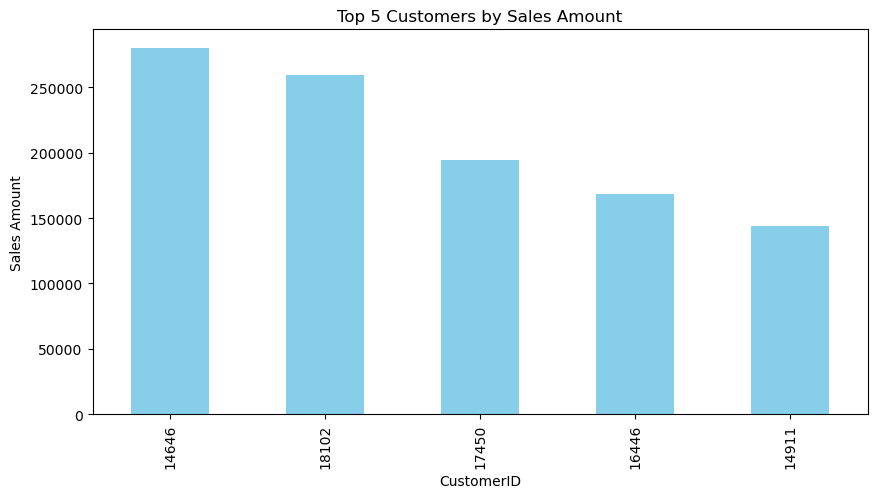

Top 5 Customers by Revenue:
 CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
Name: amount, dtype: float64


In [47]:
# Identify the top 5 customers based on revenue
top_5_customers = df.groupby("CustomerID").amount.sum().sort_values(ascending=False)[:5]

# Plot the top 5 customers
plt.figure(figsize=(10, 5))
top_5_customers.plot(kind='bar', color='skyblue', title='Top 5 Customers by Sales Amount')
plt.ylabel('Sales Amount')
plt.show()

# Print the top 5 customers' revenue
print("Top 5 Customers by Revenue:\n", top_5_customers)


The analysis identifies the top 5 customers by total revenue generated, revealing key insights into the highest value customers. Customer 14646 leads with a total purchase amount of **280,206.02**, followed by Customer 18102 with **259,657.30** and Customer 17450 with **194,390.79**. Customers 16446 and 14911 complete the top 5, with revenues of **168,472.50** and **143,711.17**, respectively. These customers collectively represent a substantial portion of overall revenue, making them critical to business profitability. Visualizing this data in a bar plot highlights the significant difference in spending among top customers, potentially informing targeted strategies for retention and personalized promotions tailored to their purchasing behaviors.

# Seasonal Trends- Extract Monthly Data and Calculate Total Sales

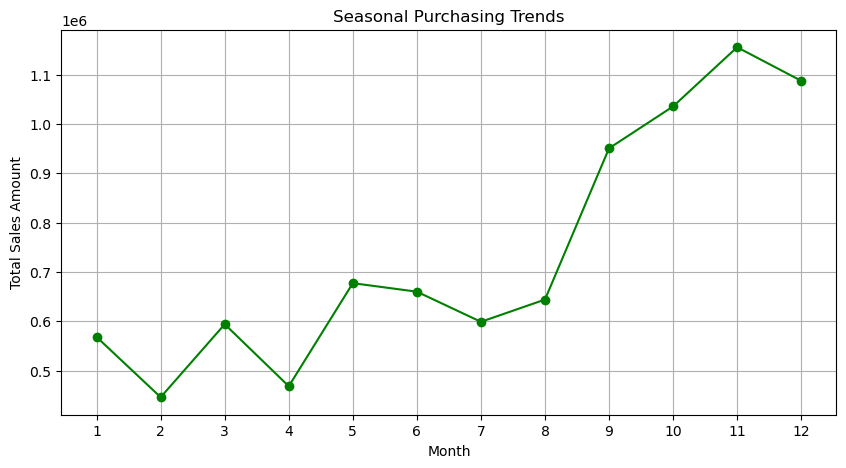

Monthly Sales:
 InvoiceMonth
1      568101.310
2      446084.920
3      594081.760
4      468374.331
5      677340.300
6      660046.050
7      598962.901
8      644051.040
9      950690.202
10    1035642.450
11    1155668.610
12    1087613.170
Name: amount, dtype: float64


In [48]:
# Extract month from the InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Group by month and calculate total sales
monthly_sales = df.groupby('InvoiceMonth').amount.sum()

# Plot the seasonal trends
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='green', title='Seasonal Purchasing Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(np.arange(1, 13, step=1))
plt.grid(True)
plt.show()

# Print the monthly sales to check for trends
print("Monthly Sales:\n", monthly_sales)


The monthly sales data analysis reveals significant seasonal trends in purchasing patterns. Sales are generally lower at the start of the year, with January sales totaling **568,101.31** and February at **446,084.92**, showing a gradual increase through the spring. By summer, the figures rise, with May and June reaching **677,340.30** and **660,046.05**, respectively. Sales peak in the fall, especially in September, October, and November, where the total sales reach **950,690.20**, **1,035,642.45**, and **1,155,668.61**, respectively. These high sales months may coincide with holiday seasons or promotional periods, indicating high consumer demand during this time. Businesses could leverage these insights to plan stock, marketing efforts, and promotions to capitalize on increased sales activity during peak months.

# Business Recommendations

<b>1. Retention Strategies for Loyal Customers</b>

<b>•	Personalized Offers and Discounts:</b> Provide custom-tailored offers to top customers based on their purchase history and preferences. Offering exclusive discounts or early access to new products can strengthen their loyalty.

<b>•	Loyalty Programs:</b> Develop a loyalty program that rewards customers for repeat purchases. Offer points for every dollar spent, which they can redeem on future purchases or exchange for exclusive products or discounts.

<b>•	VIP Membership and Exclusive Rewards:</b> Create a VIP tier for loyal customers where they can enjoy perks such as free shipping, special birthday rewards, or members-only sales events.

<b>•	Enhanced Customer Support:</b> Provide dedicated customer support channels for high-value customers to ensure their issues are resolved quickly, improving their overall shopping experience.

<b>•	Feedback Loop:</b> Regularly solicit feedback from loyal customers to understand their preferences and improve the shopping experience. This involvement makes them feel valued and keeps your business aligned with their needs.

<b>2. Re-Engagement Campaigns for At-Risk Customers</b>

<b>•	Targeted Re-Engagement Emails:</b> Send personalized emails highlighting items similar to their past purchases, offering discounts, or showcasing new arrivals. Acknowledge their previous loyalty and encourage them to return.

<b>•	Special Discounts on Preferred Categories: </b>Analyze their purchase patterns to identify categories they’ve shown interest in, and offer exclusive discounts on those categories to entice a return.

<b>•	Cart Abandonment and Reminder Emails:</b> For customers who may have left items in their cart or browsed products without purchasing, send reminder emails with a small discount to encourage completing the purchase.

<b>•	Reactivation Surveys and Offers:</b> Send surveys asking what might have caused their decreased interest, offering a discount code upon completion. Use this data to address any issues that might be preventing repeat purchases.

<b>•	Limited-Time Offers:</b> Create a sense of urgency by offering time-sensitive promotions or flash sales for these customers, compelling them to make a purchase.

<b>3. Cross-Selling and Upselling Opportunities Using Association Rules</b>

<b>•	Recommendations Based on Frequent Itemsets:</b> Utilize the Apriori results to suggest items frequently bought together. For example, if a customer purchases a coffee maker, recommend filters, cups, or coffee beans at checkout.

<b>•	Product Bundling:</b> Create bundles of frequently purchased items and offer them at a discounted rate, which can increase the average order value while providing customers with a sense of savings.

<b>•	In-Cart Suggestions:</b> While a customer is shopping, show in-cart suggestions based on their current selections. For instance, if they add specific electronics, suggest batteries or accessories that complement their purchase.

<b>•	Customized Landing Pages:</b> When returning customers log in, present them with a personalized landing page featuring products related to their previous purchases and common complementary items.

<b>•	New Product Introductions:</b> Recommend new or seasonal items that align with the frequently bought-together products. This allows customers to discover new items that may become future favorites.

<b>4. Data-Driven Marketing for Seasonal Purchasing Trends</b>

<b>•	Seasonal Promotions:</b> Identify peak purchasing periods and create seasonal campaigns or holiday discounts to capitalize on these trends.

<b>•	Dynamic Email Marketing:</b> Send emails with targeted product recommendations that change based on seasonal trends and previous customer purchases, increasing relevance and engagement.

<b>•	Trend Analysis for Inventory Management:</b> Use seasonal data to optimize stock levels and ensure that frequently purchased products during certain times of the year are adequately available.

<b>5. Enhanced Customer Segmentation Insights for Tailored Strategies</b>

<b>•	Develop Distinct Campaigns for Each Segment:</b> Implement separate strategies for loyal, at-risk, and average customers, ensuring each segment feels specifically targeted and valued.

<b>•	Track Conversion Rates and Adjust:</b> Monitor the success of each campaign to identify high-performing tactics. Continuously optimize marketing efforts based on response and conversion rates from each segment.
